# Google BigQuery Project
### Author: Peter Benzoni
### 205 Exam 2

Peter Benzoni

In [2]:
from google.cloud import bigquery
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import db_dtypes

## Step 1, 2, 3 – Execute Query and Load Data

In [25]:
client = bigquery.Client()
query = """
SELECT *
FROM `bigquery-public-data.google_trends.top_terms`
ORDER BY week DESC, rank DESC
LIMIT 2500
"""
results = pd.read_gbq(query)
results.head(250)

,term,week,score,rank,refresh_date,dma_name,dma_id
0,Ron DeSantis,2023-10-15,17,25,2023-10-17,Phoenix AZ,753
1,Jim Jordan,2023-10-15,<NA>,25,2023-10-19,Bangor ME,537
2,Ron DeSantis,2023-10-15,<NA>,25,2023-10-17,Minot-Bismarck-Dickinson(Williston) ND,687
3,Jim Jordan,2023-10-15,<NA>,25,2023-10-19,Davenport IA-Rock Island-Moline IL,682
4,Ron DeSantis,2023-10-15,<NA>,25,2023-10-17,Omaha NE,652
...,...,...,...,...,...,...,...
245,Jim Jordan,2023-10-15,100,25,2023-10-19,St. Louis MO,609
246,Ron DeSantis,2023-10-15,<NA>,25,2023-10-17,Savannah GA,507
247,Jim Jordan,2023-10-15,<NA>,25,2023-10-19,Columbus-Tupelo-West Point MS,673
248,Jim Jordan,2023-10-15,<NA>,25,2023-10-19,Idaho Falls-Pocatello ID,758


## Step 4 – Data Visualization using Pandas / Seaborn / Matplotlib

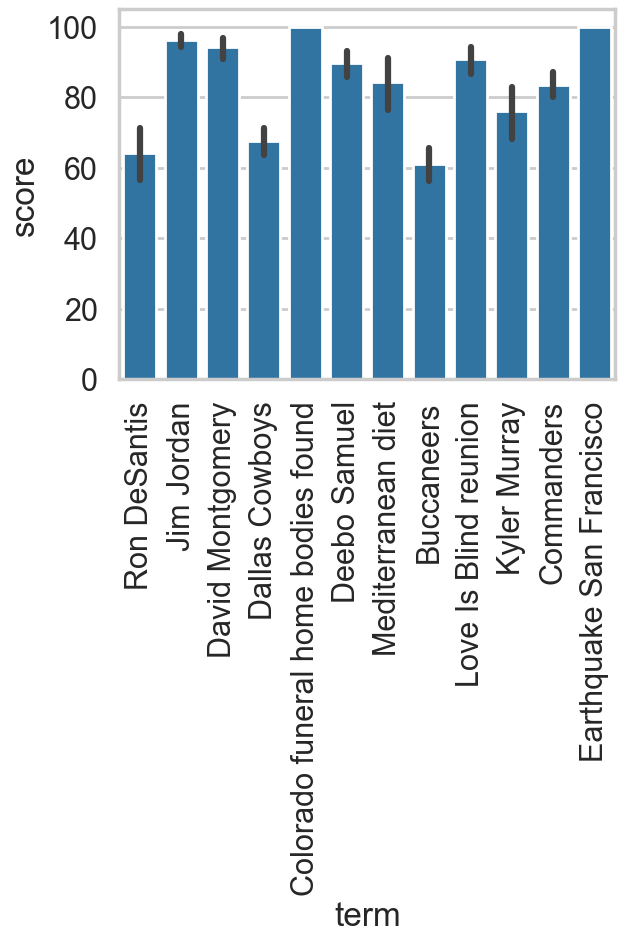

In [26]:
# Create barplot of top 5 terms with labels in diagnol

sns.set_style("whitegrid")
sns.barplot(data=results, x="term", y="score")
plt.xticks(rotation='vertical')
plt.show()

## Step 5 -  Aggregation with Pre and Post Filtering

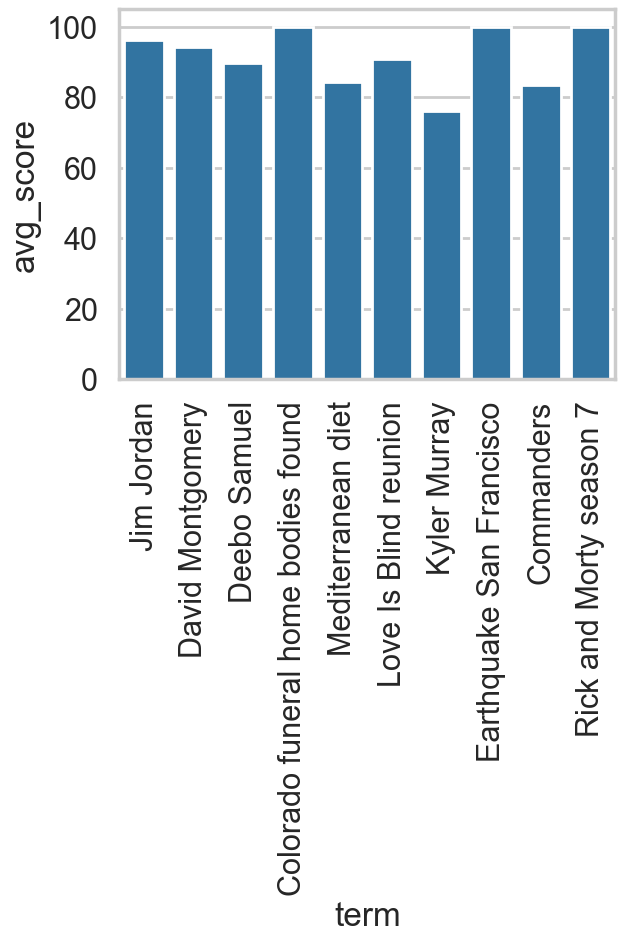

In [30]:

client = bigquery.Client()
query = """
SELECT term, week, AVG(score) as avg_score, MAX(rank) as max_rank
FROM `bigquery-public-data.google_trends.top_terms`
WHERE week = (SELECT MAX(week) FROM `bigquery-public-data.google_trends.top_terms`)
GROUP BY term, week
HAVING avg_score > 75
ORDER BY max_rank DESC
LIMIT 10;
"""
res_agg = pd.read_gbq(query)

sns.set_style("whitegrid")
sns.barplot(data=res_agg, x="term", y="avg_score")
plt.xticks(rotation='vertical')
plt.show()

## Step 6

In [34]:
# Using the Google BigQuery Python client library

client = bigquery.Client()

# Define the left outer join query
query = """
    SELECT top_terms.*, top_rising_terms.percent_gain
    FROM `bigquery-public-data.google_trends.top_terms` as top_terms
    LEFT JOIN `bigquery-public-data.google_trends.top_rising_terms` as top_rising_terms
    ON top_terms.dma_id = top_rising_terms.dma_id
    LIMIT 1000;
"""

# Execute the query and convert to a DataFrame
df = client.query(query).to_dataframe()
print(df.head())